In [1]:
import h5py
import sys
sys.path.append('..')
from modules.configfile import config
import numpy as np

In [3]:
hdf5_file = h5py.File(config['hdf5_filepath_prefix'], mode='r')

In [4]:
hdf5_file_g = hdf5_file['original_data']

# Iterate over HGG data to found crop coordinates

In [5]:
crop_coords = np.zeros((hdf5_file_g['training_data_hgg'].shape[0], 6))

for i in range(0, hdf5_file_g['training_data_hgg'].shape[0]):
    print('Patient {}'.format(i+1))
    im = hdf5_file_g['training_data_hgg'][i]
    r,c,z = np.where(im[0,:,:,:] > 0)
    crop_coords[i] = np.min(r), np.max(r), np.min(c), np.max(c), np.min(z), np.max(z)

Patient 1
Patient 2
Patient 3
Patient 4
Patient 5
Patient 6
Patient 7
Patient 8
Patient 9
Patient 10
Patient 11
Patient 12
Patient 13
Patient 14
Patient 15
Patient 16
Patient 17
Patient 18
Patient 19
Patient 20
Patient 21
Patient 22
Patient 23
Patient 24
Patient 25
Patient 26
Patient 27
Patient 28
Patient 29
Patient 30
Patient 31
Patient 32
Patient 33
Patient 34
Patient 35
Patient 36
Patient 37
Patient 38
Patient 39
Patient 40
Patient 41
Patient 42
Patient 43
Patient 44
Patient 45
Patient 46
Patient 47
Patient 48
Patient 49
Patient 50
Patient 51
Patient 52
Patient 53
Patient 54
Patient 55
Patient 56
Patient 57
Patient 58
Patient 59
Patient 60
Patient 61
Patient 62
Patient 63
Patient 64
Patient 65
Patient 66
Patient 67
Patient 68
Patient 69
Patient 70
Patient 71
Patient 72
Patient 73
Patient 74
Patient 75
Patient 76
Patient 77
Patient 78
Patient 79
Patient 80
Patient 81
Patient 82
Patient 83
Patient 84
Patient 85
Patient 86
Patient 87
Patient 88
Patient 89
Patient 90
Patient 91
Patient 

In [21]:
crop_coords = np.zeros((hdf5_file_g['training_data_lgg'].shape[0], 6))

for i in range(0, hdf5_file_g['training_data_lgg'].shape[0]):
    print('Patient {}'.format(i+1))
    im = hdf5_file_g['training_data_lgg'][i]
    r,c,z = np.where(im[0,:,:,:] > 0)
    crop_coords[i] = np.min(r), np.max(r), np.min(c), np.max(c), np.min(z), np.max(z)

Patient 1
Patient 2
Patient 3
Patient 4
Patient 5


KeyboardInterrupt: 

### Compute some statistics to see how the coordinates vary

In [6]:
m = np.mean(crop_coords, axis=0)
s = np.std(crop_coords, axis=0)

In [7]:
print('Means: {}'.format(m))
print('STD: {}'.format(s))

Means: [  45.          213.31428571   50.15714286  186.77619048    2.01428571
  139.31904762]
STD: [ 5.19615242  3.26544472  2.87833805  3.25318961  3.45098822  3.21575275]


In [8]:
final_coords_for_cropping = np.empty((1, 6))
for k in range(0, 6, 2):
    print(k, k+1)
    final_coords_for_cropping[0,k] = m[k] - 3*s[k]
    final_coords_for_cropping[0,k+1] = m[k+1] + 3*s[k+1]

(0, 1)
(2, 3)
(4, 5)


In [9]:
final_coords_for_cropping

array([[  29.41154273,  223.11061989,   41.52212871,  196.5357593 ,
          -8.33867896,  148.96630587]])

In [10]:
final_coords_for_cropping = np.clip(final_coords_for_cropping, a_max=240, a_min=0)

In [11]:
final_coords_for_cropping

array([[  29.41154273,  223.11061989,   41.52212871,  196.5357593 ,
           0.        ,  148.96630587]])

In [12]:
m = final_coords_for_cropping

In [13]:
m = np.squeeze(m)

In [18]:
coords_int = [int(x) for x in m]

In [19]:
m = coords_int

In [22]:
m

[29, 223, 41, 196, 0, 148]

In [23]:
k.shape

(194, 155, 148)

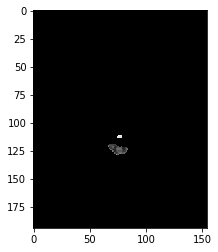

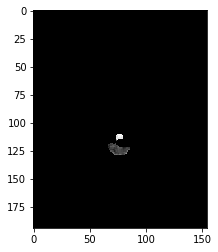

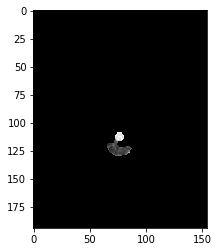

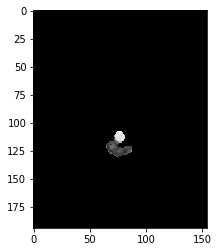

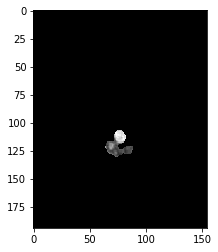

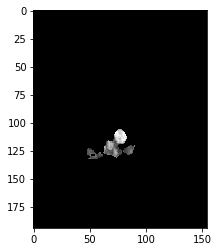

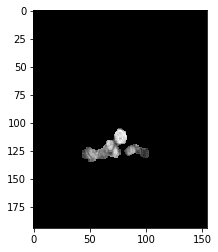

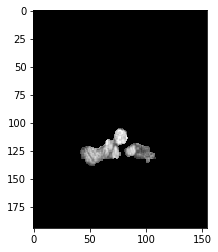

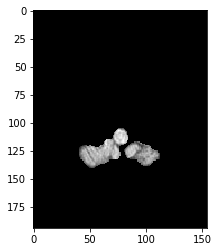

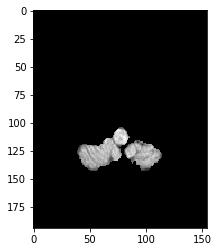

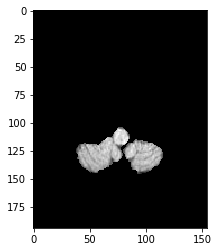

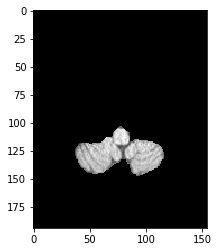

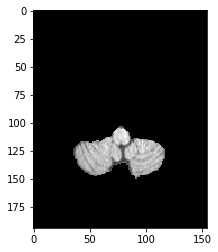

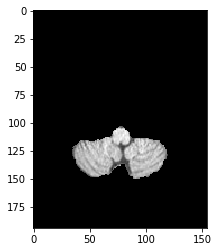

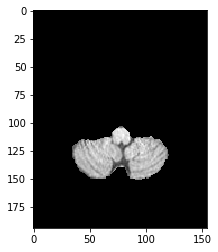

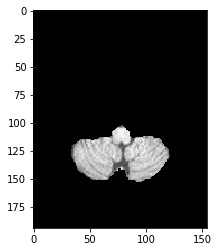

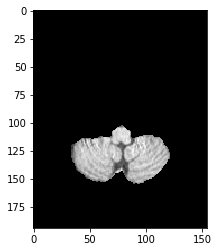

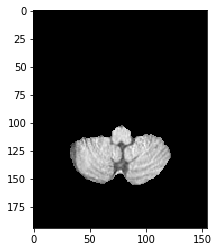

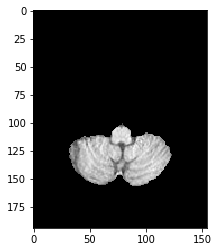

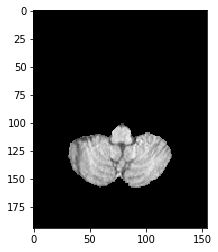

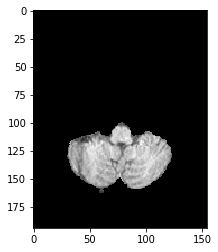

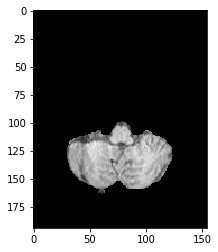

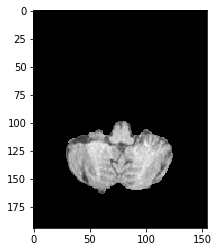

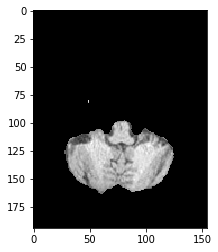

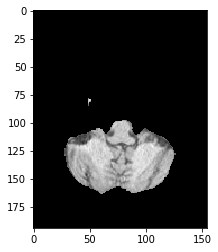

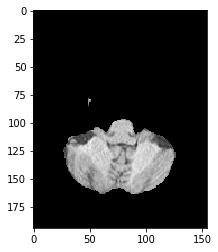

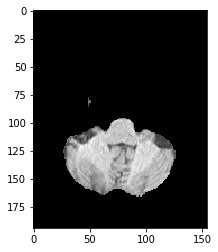

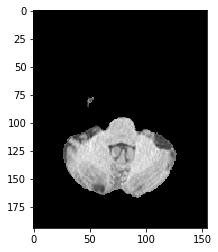

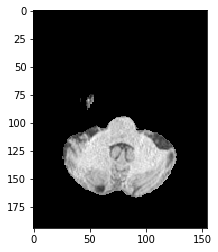

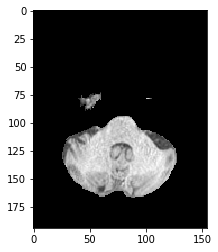

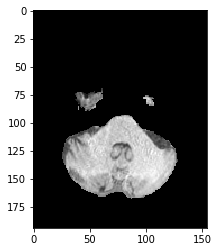

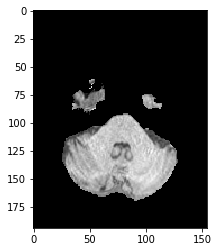

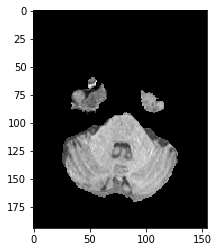

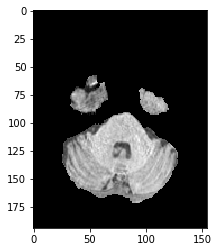

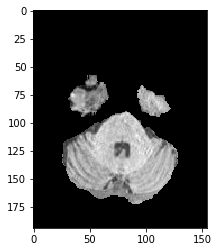

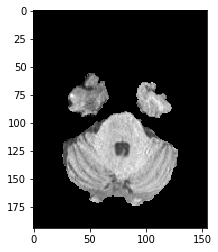

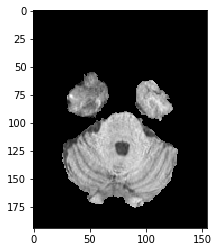

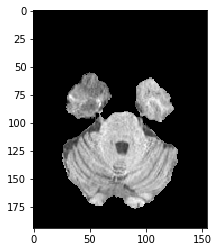

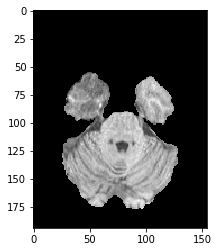

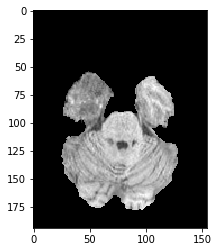

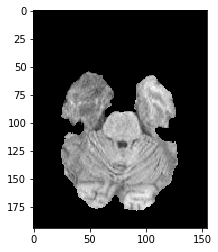

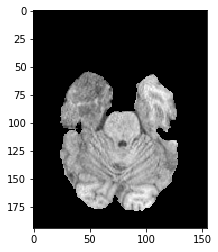

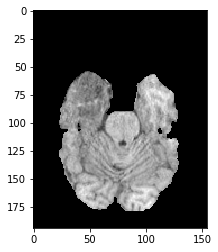

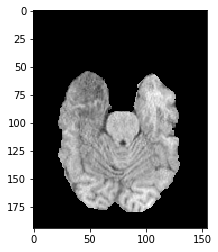

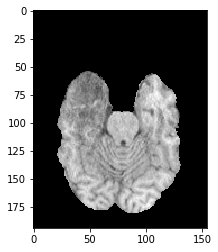

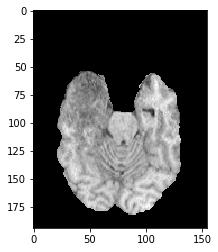

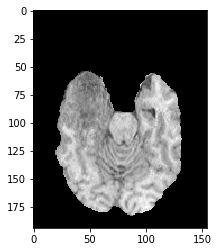

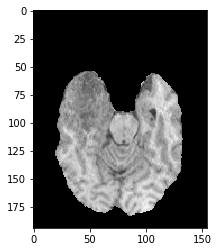

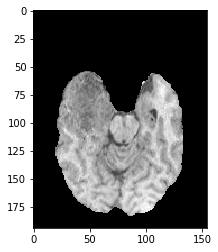

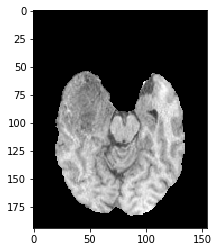

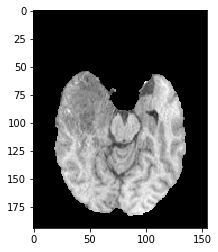

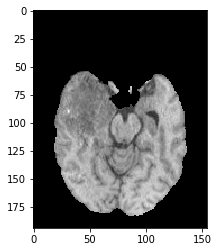

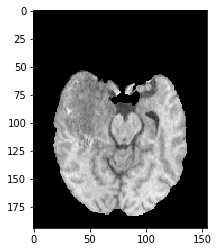

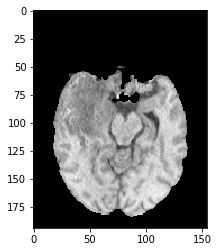

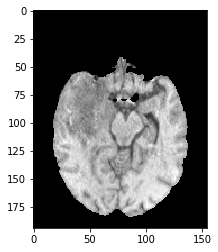

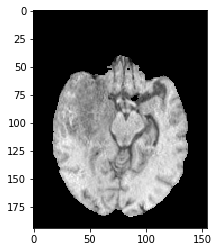

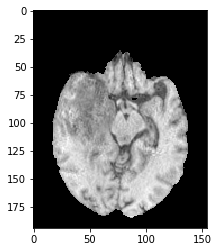

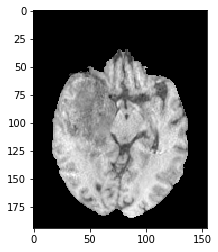

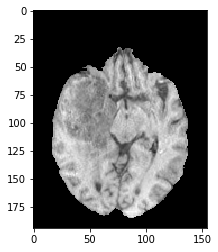

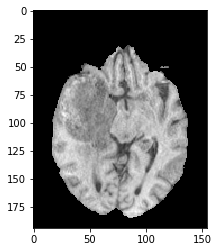

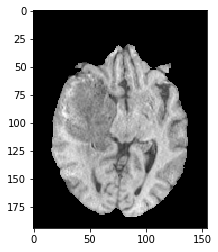

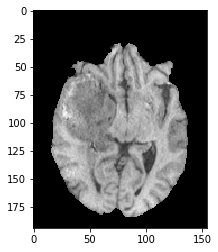

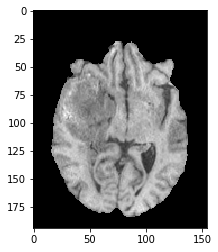

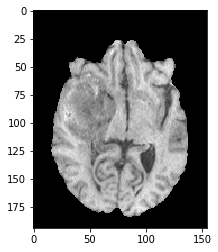

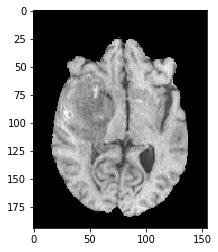

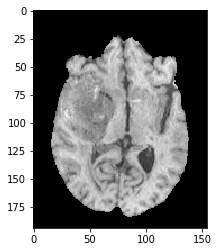

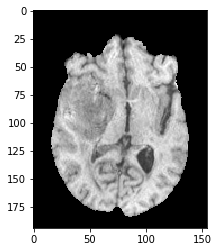

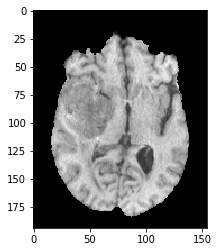

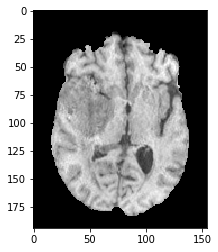

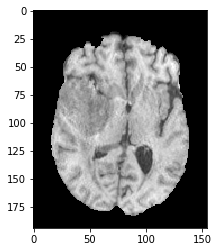

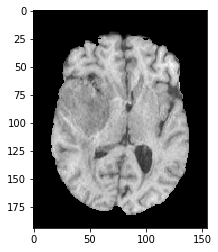

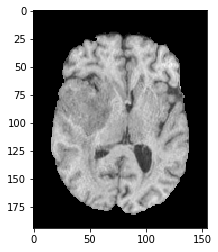

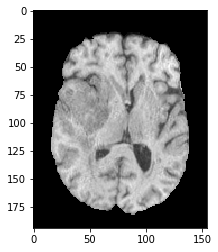

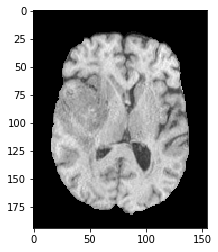

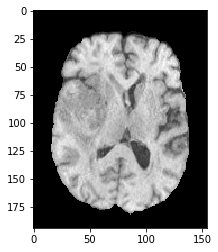

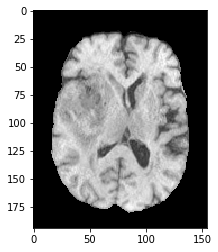

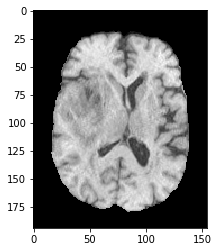

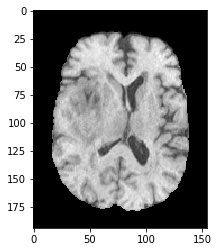

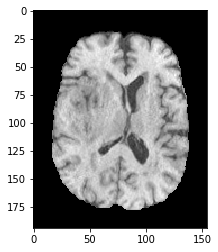

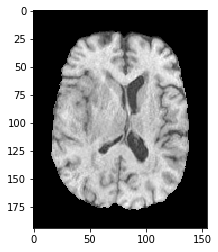

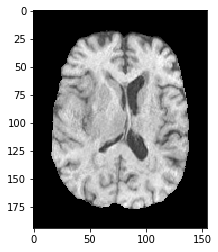

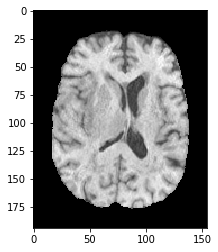

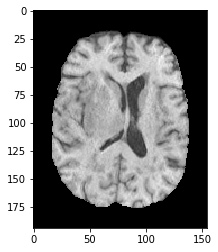

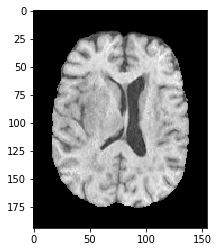

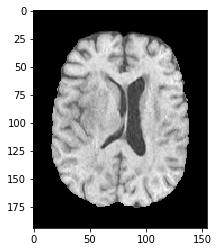

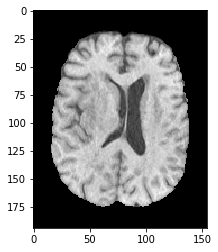

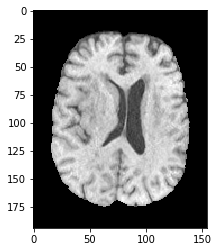

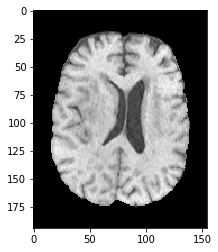

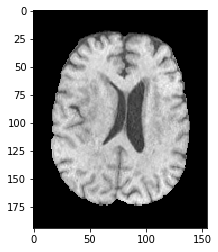

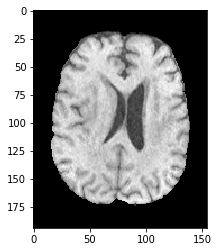

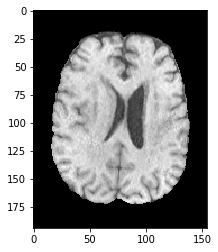

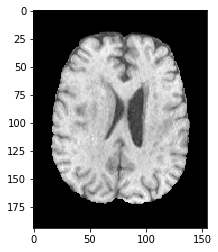

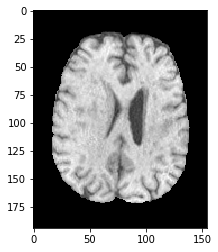

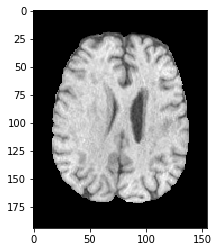

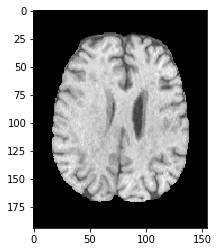

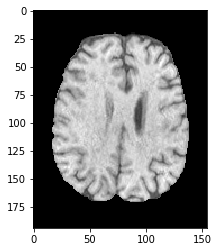

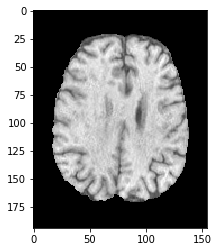

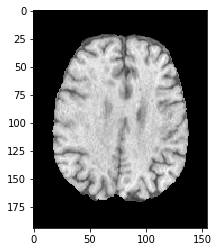

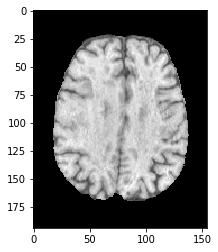

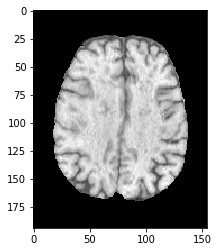

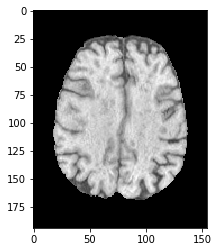

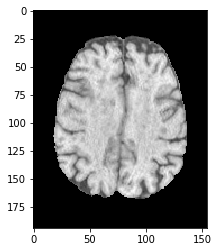

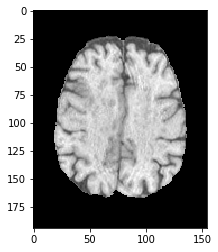

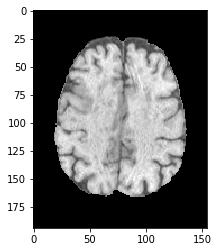

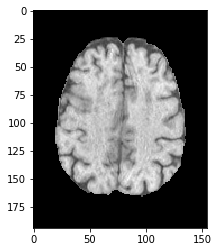

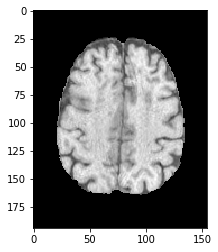

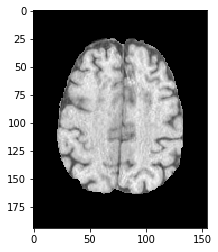

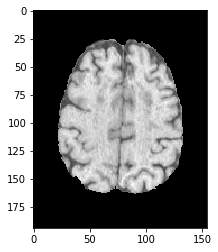

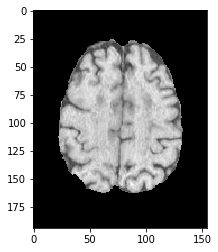

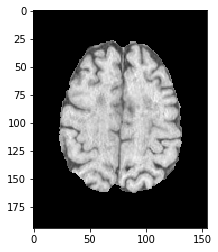

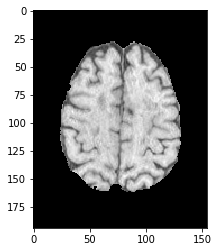

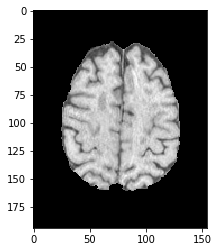

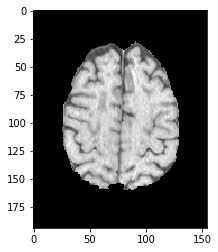

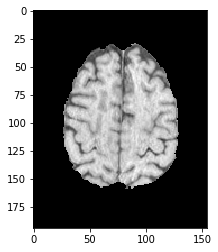

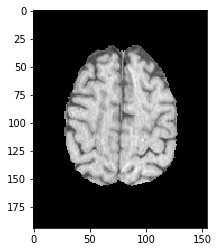

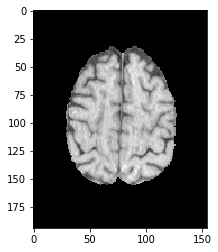

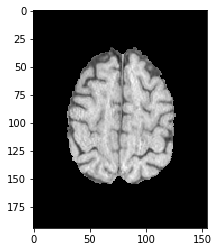

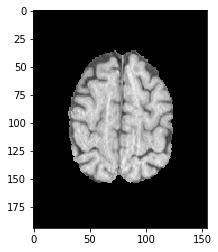

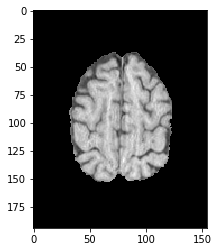

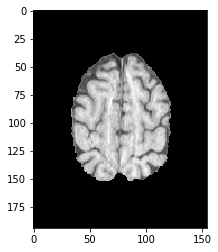

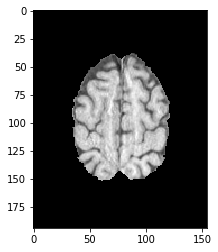

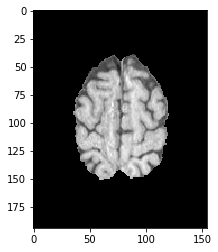

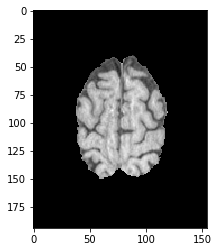

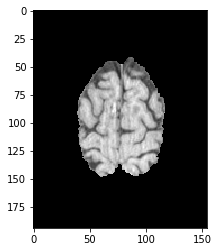

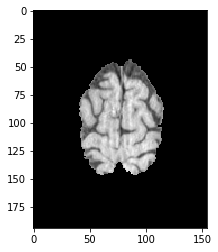

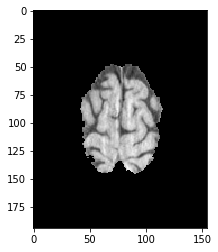

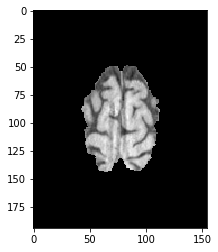

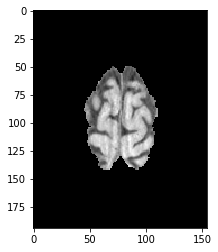

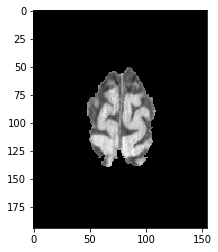

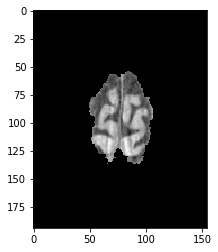

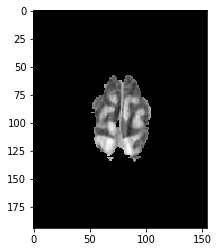

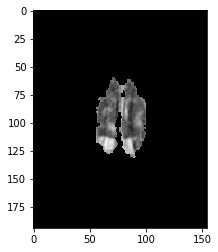

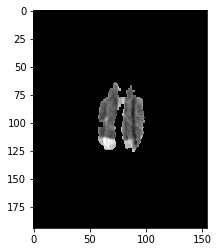

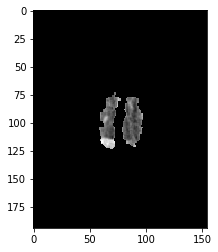

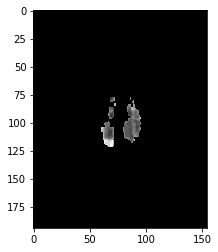

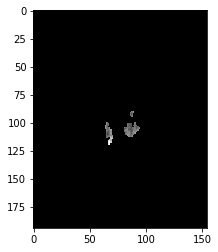

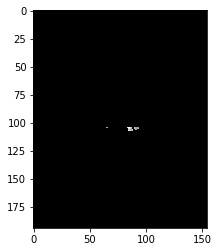

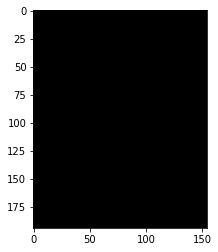

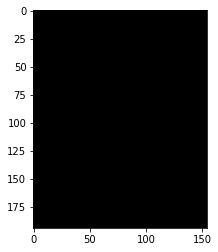

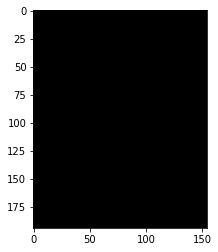

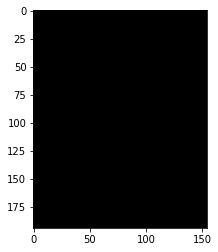

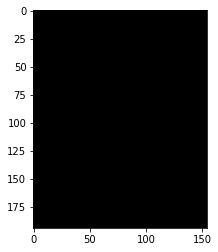

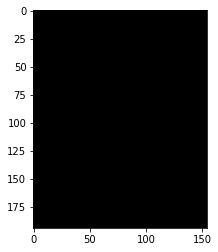

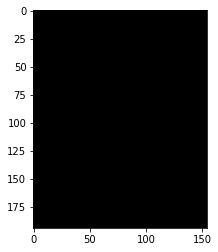

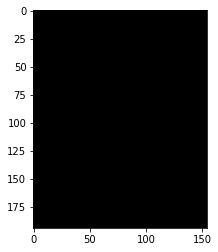

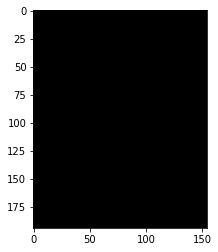

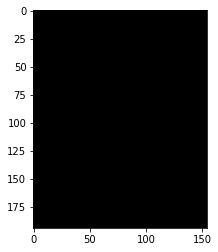

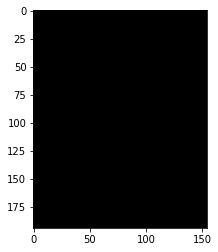

In [20]:
import matplotlib.pyplot as plt
k = im[0,m[0]:m[1],m[2]:m[3],m[4]:m[5]]
for i in range(0, k.shape[2]):
    plt.imshow(k[:,:,i], 
               cmap='gray')
    plt.show()

In [24]:
hdf5_file.close()